<a href="https://colab.research.google.com/github/mgraudina/WoTech-2024-PHYTON/blob/main/08_17_L17_TVMarketing_sales_predictions_Scikit_learn_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**L17: Project 2: TV Marketing sales prediction**
1. Know what the Scikit-learn library is and how it is used for model training
2. Know what is supervised and unsupervised training
3. Be able to use the Scikit-learn library to train a linear regression data model
4. Be able to minimally analyze the accuracy of the trained data model
5. Know what is dependend and independent variable
6. Know how to predict outcome based on a new input value.

Linear regression modesls: https://scikit-learn.org/stable/modules/linear_model.html

The overall documentation: https://scikit-learn.org/stable

In [ ]:
import pandas as pd

In [ ]:
advertising = pd.read_csv('/content/tvmarketing.csv')

# TV --> Advertising budget spent on TV marketing
# Sales --> Actual sales (revenue)

# Linear regression --> If increase of budget will result on sales increase

In [ ]:
advertising.head() # first 5 rows

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [ ]:
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [ ]:
import seaborn as sns

### Regression plot

<Axes: xlabel='TV', ylabel='Sales'>

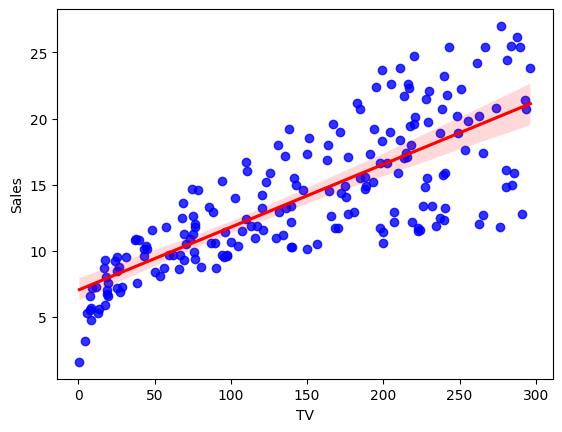

In [ ]:
sns.regplot(x='TV', y='Sales', data=advertising, ci=99,
    marker='o',
    color='blue',
    line_kws=dict(color='red'))

<Axes: xlabel='TV', ylabel='Sales'>

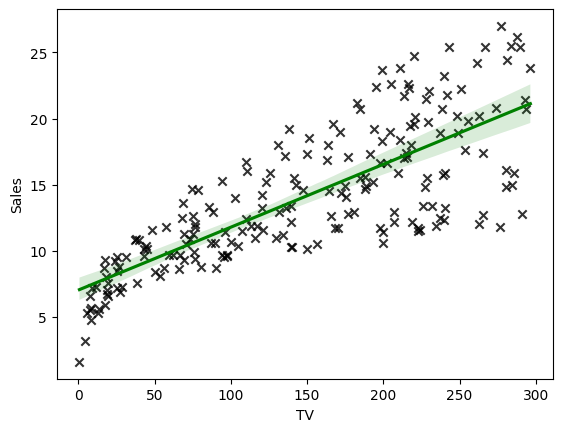

In [ ]:
    sns.regplot(
    data=advertising,
    x='TV',
    y="Sales",
    ci=99,
    marker="x",
    color="black",
    line_kws=dict(color="green"))

In [ ]:
# Pearson correlation coeficent

advertising.corr() # correlation for full dataset

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


In [ ]:
advertising['TV'].corr(advertising['Sales'])

# Strong Correlation: ±0.7 to ±1

0.7822244248616061

### SUPERVISED VS UNSUPERVISED LEARNING

In [ ]:
# unsupervised - clustering algorithm, e.g client base: want to cluster for e-mail. No predefined goups. Clustering: no predefined model.
# supervised - dependant and undependant variables

# supervised learning models have a baseline understanding of what the correct output values should be

# unsupervised - no labeled data; supervised - labeled data

# https://scikit-learn.org/stable/
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Traning Linear Regression model

In [ ]:
# Need to prep data / clean before model training

In [ ]:
# Preparing X and Y

# Single column data frames (like numpy)

X = advertising.drop('Sales', axis=1) # we are droping sales column (axis = 1)
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [ ]:
Y = advertising.drop('TV', axis=1)
Y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


### Train/Test sets

Train our model on test dataset. Predict how good is our model.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Image to Git: ![jupyter.png](https://miro.medium.com/v2/resize:fit:960/1*31iqrQyCqIuuGPLUK_BjMQ.png)
### pildi lisamin --> vt ca 35 min

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, random_state=42)

# random_state=42 --> common to use; not must; shuffling integer

# small 'y' --> how it is written in data science community
# train_size 0.7 --> 70% will be used to training the data, 30% - testing

In [ ]:
X_train

,TV
169,284.3
97,184.9
31,112.9
12,23.8
35,290.7
...,...
106,25.0
14,204.1
92,217.7
179,165.6


In [ ]:
# COLUMN --> FEATURE
# ROW --> OBSERVATION

### Train the model

In [ ]:
from sklearn.linear_model import LinearRegression # import the model

# MAIN STEPS when uning SKLEARN -->
# 1. import model
# 2. initialize model (import code behind the model)
# 3. call the model, fit it the model (=train the model)

In [ ]:
model = LinearRegression() # Initialize the model

In [ ]:
model.fit(X_train, y_train) # Fit the model (to our data)

LinearRegression()

In [ ]:
### Y = mX + b ###

print(f'Model intercept is: {model.intercept_}') # intercept - point where linear line crosses/intercepts X or Y axis
print(f'Model coefficiant is: {model.coef_}') # slope of the line

# Y: The dependent variable (the outcome or the value you're trying to predict).
# X: The independent variable (the input or the value you're using to make the prediction).
# m: The slope of the line, which represents the rate of change of Y with respect to X. It tells you how much Y changes for a one-unit change in X.
# b: The intercept is the value of Y when X=0. In other words, it's the point where the line crosses the Y-axis.

Model intercept is: [7.23945983]
Model coefficiant is: [[0.0464078]]


In [ ]:
my_new_budget = [[150]]

my_predicted_sales = model.predict(my_new_budget)
my_predicted_sales
print(f'When the budget is {my_new_budget}, then predicted sales are {my_predicted_sales}')

# format - as we have trained our model, 2-dimensional, X and Y
#[[]] - double brackets, creating 2D array dataset

When the n budget is [[150]], then predicted saes are [[14.20063015]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
my_new_budget[0][0] # to remove double brackets

150

In [ ]:
X_test.head()

,TV
127,80.2
12,23.8
189,18.7
128,220.3
116,139.2


In [ ]:
y_pred = model.predict(X_test) # prediction of test dataset

In [ ]:
final_df = pd.DataFrame()
final_df['TV'] = X_test
final_df['Actual_sales'] = y_test
final_df['Predicted_sales'] = y_pred
final_df.head()

# X- independent variable, y - dependent, thus X capital, y small letter

,TV,Actual_sales,Predicted_sales
95,163.3,16.9,14.817854
15,195.4,22.4,16.307544
30,292.9,21.4,20.832305
158,11.7,7.3,7.782431
128,220.3,24.7,17.463099


In [ ]:
final_df['ABS_Error_Actual_vs_Predicted'] = abs(final_df['Actual_sales']-final_df['Predicted_sales'])

# ABS - absolute vales

In [ ]:
final_df.head()

,TV,Actual_sales,Predicted_sales,ABS_Error_Actual_vs_Predicted
95,163.3,16.9,14.817854,2.082146
15,195.4,22.4,16.307544,6.092456
30,292.9,21.4,20.832305,0.567695
158,11.7,7.3,7.782431,0.482431
128,220.3,24.7,17.463099,7.236901


In [ ]:
# if you run the data split --> model fit several times and then take some average of the resulting model parameters (m, b), we could come up with a better-fitting model

In [ ]:
# CTRL + F9 --> ro RUN all the code!

### Visualize the results

In [ ]:
final_df.reset_index(inplace=True)
# we create a new index for the current dataframe that starts with 0 and goes to the end of the df

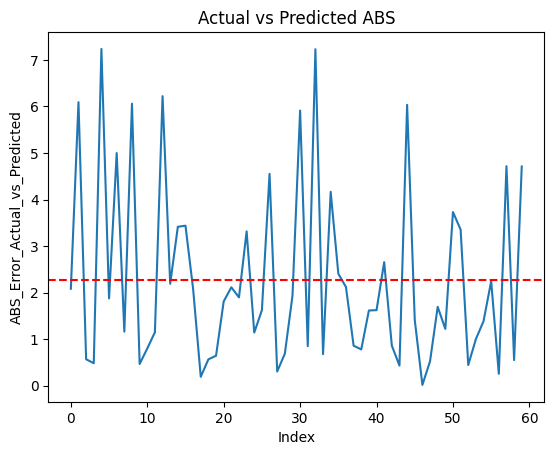

In [ ]:
import matplotlib.pyplot as plt

plt.plot(final_df.index, final_df.ABS_Error_Actual_vs_Predicted) # x, y
plt.title('Actual vs Predicted ABS')
plt.xlabel('Index')
plt.ylabel('ABS_Error_Actual_vs_Predicted')
plt.axhline(final_df['ABS_Error_Actual_vs_Predicted'].mean(), linestyle='dashed', color='red')

In [ ]:
# MEAN ABSOLUTE ERROR

# One way to evaluate model: performing good or bad
# All different metrics for model evaluation -->
# https://scikit-learn.org/stable/api/sklearn.metrics.html#module-sklearn.metrics

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

print(f'Mean ABS erorr is: {mae}')

# MEA = average distance btw real and predicted data
# the lower ABS error is, the more accurate model is - the shorter the distance

Mean ABS erorr is: 2.2758809050205113


In [ ]:
# R2 and MSE

from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE is: {mse}')
print(f'r2 is: {r2}')

# mse (mean squared error) = squares the distances, brings out the big errors better

MSE is: 8.970991242413614
r2 is: 0.6714477229302764


In [ ]:
'''
R² = 1: Perfect prediction! The line you drew predicts every single point exactly as it is. The model explains 100% of the variation in the data.
R² = 0: Your model is as good as just predicting the average of all the points. The model explains none of the variation in the data.
R² < 0: Your model is worse than just predicting the average. It means your predictions are pretty off.

The R² score ranges from 0 to 1 for a well-fitting model, but it can also be negative if the model is performing worse than a simple horizontal line representing the mean of the target variable.
'''

###TEAMWORK

Look at scikit-learn library.
1. What is an error rate?
2. Where you could use other machine-learning models?
3. What is the difference between supervised and unsupervised training?
4. How to import different models from the scikit-learn package?
5. How can you evaluate the performance of a machine learning model in scikit-learn?
6. What metrics are commonly used for evaluation?
7. What is model overfitting, and how can it be prevented?

Linear regression models: https://scikit-learn.org/stable/modules/linear_model.html

The overall documentation: https://scikit-learn.org/stable